In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

seed_val = 42
np.random.seed(seed_val)

# Question 1

* Implement perceptron learning algorithm for classifying a linearly separable dataset in 2D.Create such a dataset with at least 1000 data points. Plot the dataset before and after training (with the classifier).

* Discuss your observations with respect to the number of iterations required for perfect classification (k) by varying the level of separability (γ from the class discussions) in the dataset.




In [2]:
# Generate a linearly separable dataset
def generate_dataset(num_points, mean_class_a, variance_class_a, mean_class_b, variance_class_b):
    """
    Generates a linearly separable dataset by creating two concentric circles with given mean and variance
    
    """
    np.random.seed(seed_val)
    # Class -1 points
    class_a_points = np.random.normal(loc=mean_class_a, scale=variance_class_a, size=(num_points // 2, 2))    
    # Class 1 points
    class_b_points = np.random.normal(loc=mean_class_b, scale=variance_class_b, size=(num_points // 2, 2))
    
    # Combine the points and labels
    X = np.vstack((class_a_points, class_b_points))
    y = np.concatenate((-1 * np.ones(num_points // 2), np.ones(num_points // 2)))

    # Shuffle the dataset
    shuffle_indices = np.random.permutation(num_points)
    X = X[shuffle_indices]
    y = y[shuffle_indices]
    
    return X, y

# Plot the dataset
def plot_dataset(features, labels, title):
    """
    Plots the dataset created 
    """
    plt.scatter(features[labels == -1, 0], features[labels == -1, 1], marker='o', label='Class 0')
    plt.scatter(features[labels == 1, 0], features[labels == 1, 1], marker='x', label='Class 1')
    plt.title('Linearly Separable Dataset')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

# Perceptron Learning Algorithm
def perceptron_train(features, labels,weights,bias,learning_rate=0.01, max_iterations=10000):
    """
    Implements the Perceptron Training Algorithm
    """
    num_updates = 0
    num_points, num_features = features.shape
    num_iterations = 0
    for _ in range(max_iterations):
        misclassified = 0
        for i in range(num_points):
            prediction = np.dot(weights, features[i]) + bias
            if labels[i] * prediction <= 0:
                weights += learning_rate * labels[i] * features[i]
                bias += learning_rate * labels[i]
                misclassified += 1         
                num_updates += 1
        num_iterations+=1
        if misclassified == 0:
            break 
    # print("Number of misclassified points by final decision boundary ",misclassified)
    return weights, bias, num_iterations


# Plot decision boundary and dataset
def plot_decision_boundary(features, labels, weights, bias, title):
    """
    Plots the decision boundary generated after training the perceptron learning algorithm
    """
    plt.scatter(features[labels == 1][:, 0], features[labels == 1][:, 1], label='Class 1', marker='o')
    plt.scatter(features[labels == -1][:, 0], features[labels == -1][:, 1], label='Class -1', marker='x')
    
    x_vals = np.linspace(-5, 5, 100)
    y_vals = (-weights[0] * x_vals - bias) / weights[1]
    plt.plot(x_vals, y_vals, '-r', label='Decision Boundary')
    
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()


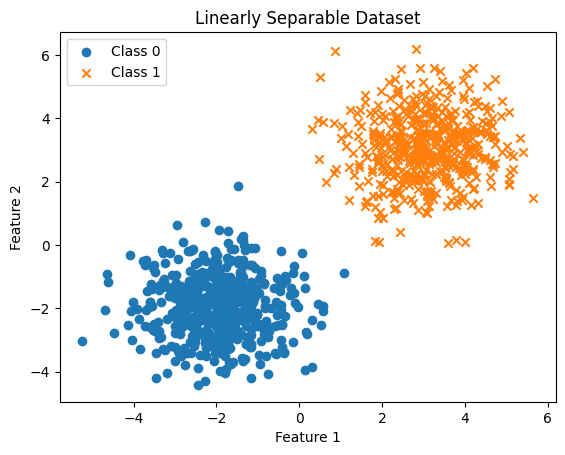

In [3]:

# Generate dataset
num_points = 1000
mean_class_a = [-2, -2]
variance_class_a = [1, 1]
mean_class_b = [3, 3]
variance_class_b = [1, 1]

features, labels = generate_dataset(num_points,mean_class_a,variance_class_a,mean_class_b,variance_class_b)

# Plot the original dataset
plot_dataset(features, labels, title='Original Dataset')


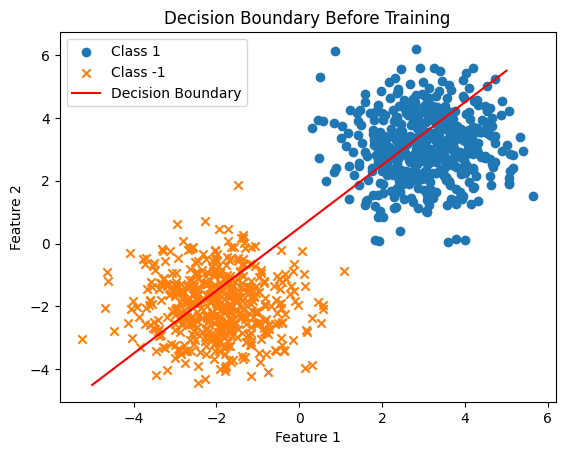

Number of iterations k =  38


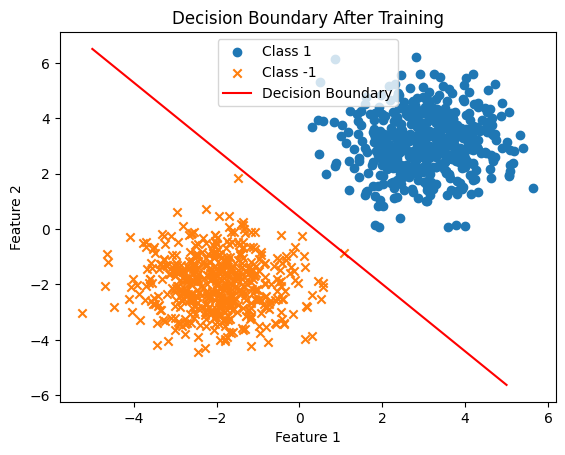

In [4]:
# Assuming you have initial_weights and initial_bias
weights_initial = np.array([1.0, -1.0])
bias_initial = 0.5

# Plot decision boundary and dataset before training
plot_decision_boundary(features, labels, weights_initial, bias_initial, title='Decision Boundary Before Training')

# Train the perceptron
weights, bias,num_updates = perceptron_train(features, labels,weights_initial,bias_initial)

print("Number of iterations k = ",num_updates)
# Plot the dataset with the decision boundary
plot_decision_boundary(features, labels, weights, bias, title='Decision Boundary After Training')


In [5]:

# Generate dataset
num_points = 1000

# list of scalar values all greater than 1 to make the clusters more distant from each other 
gamma_coef_list = [1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6]
gamma_list = []
num_iterations_list = []

for gamma_coef in gamma_coef_list:
    mean_class_a = [-2*gamma_coef, -2*gamma_coef]
    variance_class_a = [1, 1]
    mean_class_b = [2*gamma_coef, 2*gamma_coef]
    variance_class_b = [1, 1]

    # Calculate Euclidean distance between mean_class_a and mean_class_b
    gamma = np.sqrt((mean_class_b[0] - mean_class_a[0])**2 + (mean_class_b[1] - mean_class_a[1])**2)

    features, labels = generate_dataset(num_points,mean_class_a,variance_class_a,mean_class_b,variance_class_b)
    
    weights_initial = np.array([1.0, -1.0])
    bias_initial = 0.5
    # Train the perceptron
    weights, bias,num_updates = perceptron_train(features, labels,weights_initial,bias_initial)

    print("For gamma {0} Number of iterations k = {1} ".format(gamma,num_updates))
    print()
    gamma_list.append(gamma)
    num_iterations_list.append(num_updates)



For gamma 6.788225099390856 Number of iterations k = 32 

For gamma 7.919595949289332 Number of iterations k = 21 

For gamma 9.05096679918781 Number of iterations k = 12 

For gamma 10.182337649086284 Number of iterations k = 6 

For gamma 11.313708498984761 Number of iterations k = 3 

For gamma 12.445079348883237 Number of iterations k = 2 

For gamma 13.576450198781712 Number of iterations k = 2 

For gamma 14.70782104868019 Number of iterations k = 2 



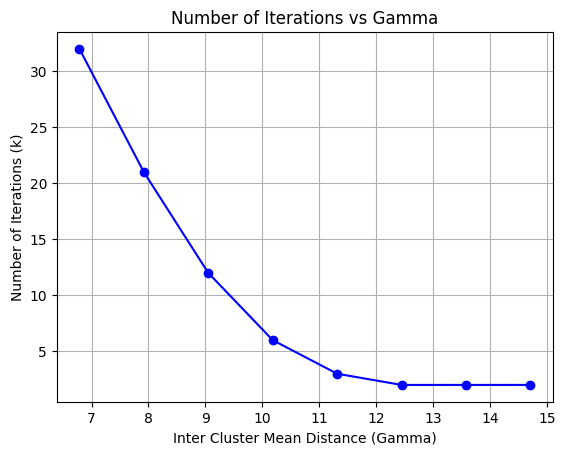

In [6]:

# Plotting the impact on number of iterations on increase of gamma
plt.plot(gamma_list, num_iterations_list, marker='o', linestyle='-', color='b')
plt.title('Number of Iterations vs Gamma')
plt.xlabel('Inter Cluster Mean Distance (Gamma)')
plt.ylabel('Number of Iterations (k)')
plt.grid(True)
plt.show()

## 1.1 Approach

1. Create two concentric circles with varying mean and variance values to generate the linearly dataset
2. Plot the data and the decision boundary before training the Perceptron Learning Algorithm
3. Train Perceptron Learning Algorithm and plot the decision boundary after training.
4. Multiply the x coordinates of the mean of both clusters by list of increasing scalar values to make them increasingly distant from each other while keeping variance of clusters constant.
5. We calculate(approximate) gamma as **Euclidean distance between mean of two clusters** (having equal variance) and also record the number of iterations it takes Perceptron Learning Algorithm to reach convergence.

## 1.2 Observations

1. We observe that as the `gamma decreases the number of iterations required to separate the linearly separable data decreases` i.e k decreases.

2. We also observe the decrease is quite rapid and resembles the inverse quadratic relation between K and Gamma i.e K = R^2/Gamma**2

# Question 2


* Consider solving the above problem (training a line for classifying a linearly separable 2D dataset) using Gradient Descent algorithm. Think of a loss function (beyond simple MSE) based on our classroom discussion on the desirable properties of a loss function. 
* You may implement the analytical way of finding gradient for it. You may implement the basic version of gradient descentupdate equation. 
* Plot the dataset before and after training (with the classifier).


In [7]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-15  # Small value to avoid log(0)
    return -np.mean(y_true * np.log(y_pred + epsilon) + (1 - y_true) * np.log(1 - y_pred + epsilon))

def gradient_descent(features, labels,weights,bias, learning_rate=0.01, num_iterations=1000):
    num_points, num_features = features.shape

    for _ in range(num_iterations):
        predictions = sigmoid(np.dot(features, weights) + bias)
        loss = cross_entropy_loss(labels, predictions)

        # Gradient of the loss with respect to weights and bias
        gradient_weights = np.dot(features.T, predictions - labels) / num_points
        gradient_bias = np.sum(predictions - labels) / num_points

        # Update weights and bias
        weights -= learning_rate * gradient_weights
        bias -= learning_rate * gradient_bias

    return weights, bias


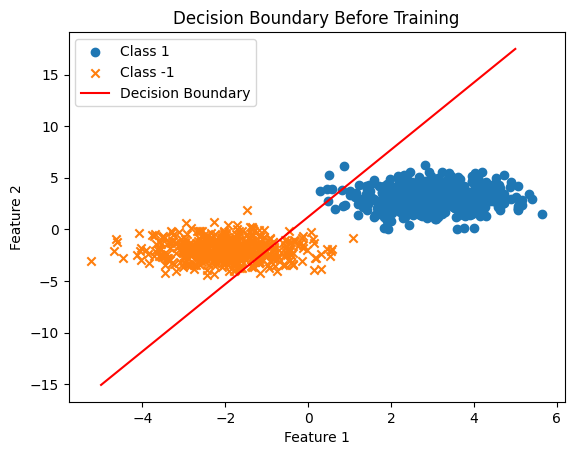

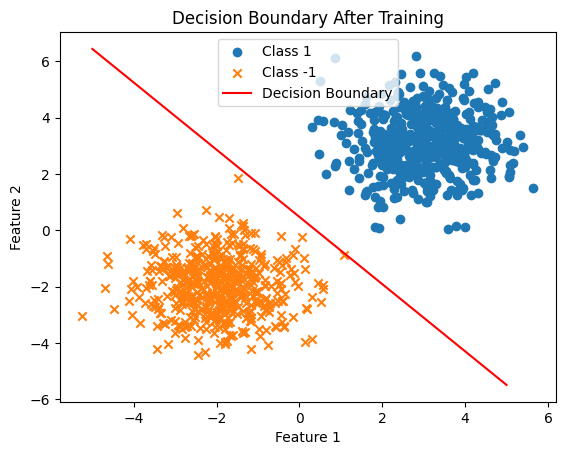

In [8]:
# # Generate a linearly separable dataset
num_points = 1000
mean_class_a = [-2, -2]
variance_class_a = [1, 1]
mean_class_b = [3, 3]
variance_class_b = [1, 1]

features, labels = generate_dataset(num_points,mean_class_a,variance_class_a,mean_class_b,variance_class_b)

# Plot decision boundary and dataset before training
plot_decision_boundary(features, labels, weights_initial, bias_initial, title='Decision Boundary Before Training')

# Train using Gradient Descent
weights, bias = gradient_descent(features, labels,weights_initial,bias_initial)

# Plot the dataset with the decision boundary
plot_decision_boundary(features, labels, weights, bias, title='Decision Boundary After Training')

## 2.1 Approach 
1. We create linearly separable dataset as created in Question1 i.e by creating clusters of distinct mean values but same variance
2. Plot the data and the decision boundary before training the Gradient Descent Algorithm
3. We chose **Binary Cross Entropy** as our Loss function for the above case as it involves two classes
4. Train Gradient Descent Algorithm and plot the decision boundary after training.

## 2.2 Observation

1. We observe that Gradient Descent Algorithm is able to classify the datapoints perfectly.

# Question 3

* Consider a binary classification dataset that is not linearly separable in 2D (e.g., data lying on the circumference of two concentric circles).
* Train a Multi-Layered network of Perceptrons (MLP) with a single hidden layer for classifying the same. You may use the loss function used in problem 2. 
* You have to implement the gradient descent (i.e. backpropagation) algorithm yourself

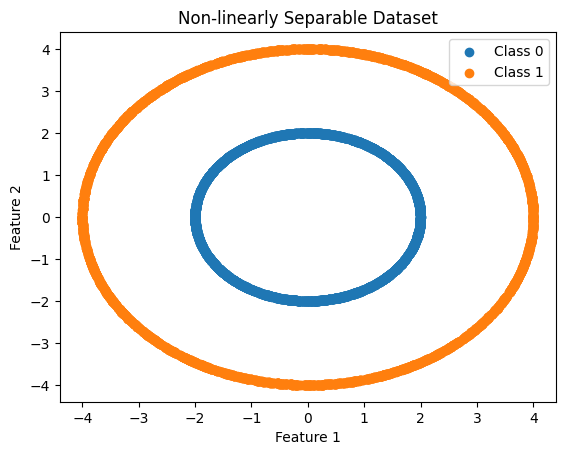

In [9]:
def generate_non_linearly_separable_dataset(num_points, inner_radius, outer_radius):
    """
    generates dataset with two concentric circles i.e non linearly separable dataset
    """
    np.random.seed(seed_val)

    # Generate random angles for points on the circles
    theta_inner = np.random.uniform(0, 2*np.pi, num_points // 2)
    theta_outer = np.random.uniform(0, 2*np.pi, num_points // 2)

    # Generate points on the circumference of the circles
    inner_circle_x = inner_radius * np.cos(theta_inner)
    inner_circle_y = inner_radius * np.sin(theta_inner)

    outer_circle_x = outer_radius * np.cos(theta_outer)
    outer_circle_y = outer_radius * np.sin(theta_outer)

    # Combine the points and labels
    X = np.vstack((np.column_stack((inner_circle_x, inner_circle_y)),
                   np.column_stack((outer_circle_x, outer_circle_y))))

    y = np.concatenate((np.zeros(num_points // 2), np.ones(num_points // 2)))

    # Shuffle the dataset
    shuffle_indices = np.random.permutation(num_points)
    X = X[shuffle_indices]
    y = y[shuffle_indices]

    return X, y

def plot_dataset(X,y):
    """
    Plot the dataset
    """
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Class 0')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Class 1')
    plt.title('Non-linearly Separable Dataset')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()


X,y = generate_non_linearly_separable_dataset(num_points=5000,inner_radius=2,outer_radius=4)

plot_dataset(X,y)
y = y.reshape(-1, 1)

In [10]:
class MLP():
    def __init__(self,learning_rate=0.001,epochs=500,hidden_layer_size=4):
        self.learning_rate = learning_rate
        self.epochs=epochs
        self.hidden_layer_size = hidden_layer_size
        
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self,x):
        return x * (1 - x)
    
    def initialize_parameters(self,input_size, output_size):
        np.random.seed(seed_val)
        weights_input_hidden = np.random.randn(input_size, self.hidden_layer_size)
        bias_input_hidden = np.zeros((1, self.hidden_layer_size))
        
        # Ensure the correct shape for weights_hidden_output
        weights_hidden_output = np.random.randn(self.hidden_layer_size, output_size)
        
        bias_hidden_output = np.zeros((1, output_size))
        return weights_input_hidden, bias_input_hidden, weights_hidden_output, bias_hidden_output
    
    
    def forward_propagation(self,X, weights_input_hidden, bias_input_hidden, weights_hidden_output, bias_hidden_output):
        hidden_input = np.dot(X, weights_input_hidden) + bias_input_hidden
        hidden_output = sigmoid(hidden_input)
        output_layer_input = np.dot(hidden_output, weights_hidden_output) + bias_hidden_output
        predicted_output = sigmoid(output_layer_input)
        return hidden_input, hidden_output, output_layer_input, predicted_output
    
    def compute_loss(self,y_true, y_pred):
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    
    
    def backward_propagation(self,X, y, hidden_input, hidden_output, output_layer_input, predicted_output,
                              weights_hidden_output, bias_hidden_output, weights_input_hidden, bias_input_hidden):
        output_error = y - predicted_output
        output_delta = output_error * self.sigmoid_derivative(predicted_output)
        hidden_layer_error = output_delta.dot(weights_hidden_output.T)
        hidden_layer_delta = hidden_layer_error * self.sigmoid_derivative(hidden_output)
    
        # Update weights and biases
        weights_hidden_output += hidden_output.T.dot(output_delta) * self.learning_rate
        bias_hidden_output += np.sum(output_delta, axis=0, keepdims=True) * self.learning_rate
        weights_input_hidden += X.T.dot(hidden_layer_delta) * self.learning_rate
        bias_input_hidden += np.sum(hidden_layer_delta, axis=0, keepdims=True) * self.learning_rate
    
    
    def calculate_accuracy(self,y_true, y_pred):
        # Convert predicted probabilities to binary values (0 or 1)
        y_pred_binary = (y_pred > 0.5).astype(int)
        # Compare predicted values to actual labels
        correct_predictions = np.sum(y_true == y_pred_binary)
        # Calculate accuracy
        accuracy = correct_predictions / len(y_true)
        return accuracy
    
    
    def train_neural_network(self,X_train, y_train, X_test, y_test):
        input_size = X_train.shape[1]
        output_size = 1
    
        weights_input_hidden, bias_input_hidden, weights_hidden_output, bias_hidden_output = self.initialize_parameters(input_size,
                                                                                                                        output_size)
        train_losses = []
        test_losses = []
        train_accuracies = []
        test_accuracies = []
    
        for epoch in range(self.epochs):
            # Forward Propagation - Training
            hidden_input_train, hidden_output_train, output_layer_input_train, predicted_output_train = self.forward_propagation(
                X_train, weights_input_hidden, bias_input_hidden, weights_hidden_output, bias_hidden_output)
    
            # Backward Propagation - Training
            self.backward_propagation(X_train, y_train, hidden_input_train, hidden_output_train, output_layer_input_train, predicted_output_train,
                                  weights_hidden_output, bias_hidden_output, weights_input_hidden, bias_input_hidden)
    
            # Compute and store training loss and accuracy
            train_loss = self.compute_loss(y_train, predicted_output_train)
            train_losses.append(train_loss)
            train_accuracy = self.calculate_accuracy(y_train, predicted_output_train)
            train_accuracies.append(train_accuracy)
    
            # Forward Propagation - Testing
            hidden_input_test, hidden_output_test, output_layer_input_test, predicted_output_test = self.forward_propagation(
                X_test, weights_input_hidden, bias_input_hidden, weights_hidden_output, bias_hidden_output)
    
            # Compute and store test loss and accuracy
            test_loss = self.compute_loss(y_test, predicted_output_test)
            test_losses.append(test_loss)
            test_accuracy = self.calculate_accuracy(y_test, predicted_output_test)
            test_accuracies.append(test_accuracy)
    
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Train Loss: {np.round(train_loss, 3)}, Train Accuracy: {train_accuracy}, "
                      f"Test Loss: {np.round(test_loss, 3)}, Test Accuracy: {test_accuracy}")
    
        return train_losses, test_losses, train_accuracies, test_accuracies, weights_input_hidden, bias_input_hidden, weights_hidden_output, bias_hidden_output
    
    
    def plot_loss_and_accuracy(self,train_losses,test_losses,train_accuracies,test_accuracies):
        # Plot the training and test losses
        plt.plot(train_losses, label='Train Loss')
        plt.plot(test_losses, label='Test Loss')
        plt.title('Training and Test Loss for Hidden Layer Size {0}'.format(self.hidden_layer_size))
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()
        
        # Plot the training and test accuracies
        plt.plot(train_accuracies, label='Train Accuracy')
        plt.plot(test_accuracies, label='Test Accuracy')
        plt.title('Training and Test Accuracy for Hidden Layer Size {0}'.format(self.hidden_layer_size))
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()
        
    
    
    def plot_decision_boundary(self,X, y, weights_input_hidden, bias_input_hidden, weights_hidden_output, bias_hidden_output, num_hidden):
        # Generate a grid of points
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
        
        # Flatten the grid and make predictions
        grid_points = np.c_[xx.ravel(), yy.ravel()]
        grid_predictions = self.forward_propagation(grid_points, weights_input_hidden, bias_input_hidden, weights_hidden_output, bias_hidden_output)[-1]
        
        # Reshape predictions for plotting
        grid_predictions = grid_predictions.reshape(xx.shape)
        
        # Reshape y for indexing
        y = y.reshape(-1)
        
        # Plot decision boundary with white background
        plt.contourf(xx, yy, grid_predictions, cmap='gray', alpha=0.8, levels=[0, 0.5, 1])
    
        # Plot the dataset
        plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Class 0')
        plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Class 1')
        plt.title('Decision Boundary with {0} hidden layers'.format(num_hidden))
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.legend()
        plt.show()


Epoch 0, Train Loss: 0.743, Train Accuracy: 0.53175, Test Loss: 0.724, Test Accuracy: 0.504
Epoch 100, Train Loss: 0.685, Train Accuracy: 0.63975, Test Loss: 0.684, Test Accuracy: 0.647
Epoch 200, Train Loss: 0.597, Train Accuracy: 0.79, Test Loss: 0.595, Test Accuracy: 0.788
Epoch 300, Train Loss: 0.491, Train Accuracy: 0.87225, Test Loss: 0.489, Test Accuracy: 0.874
Epoch 400, Train Loss: 0.334, Train Accuracy: 1.0, Test Loss: 0.336, Test Accuracy: 1.0


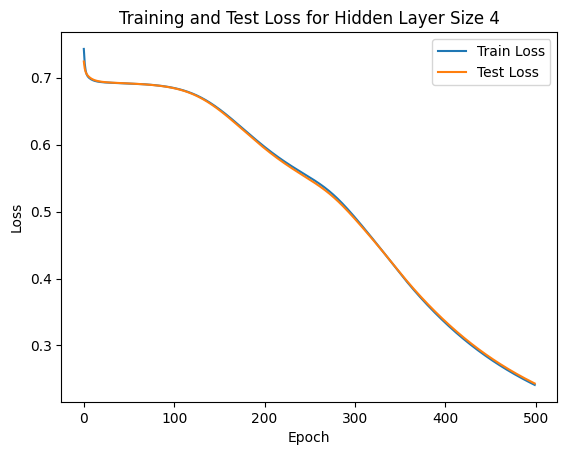

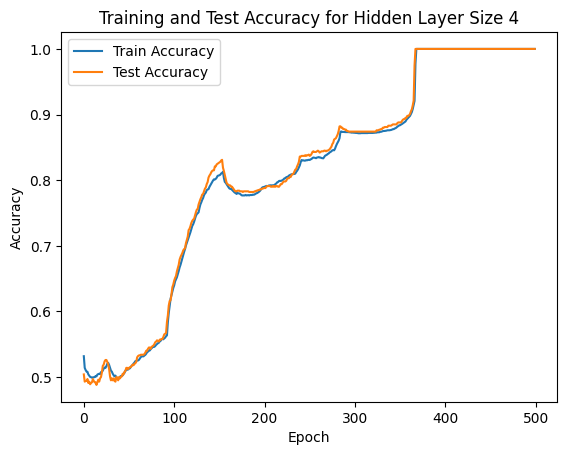

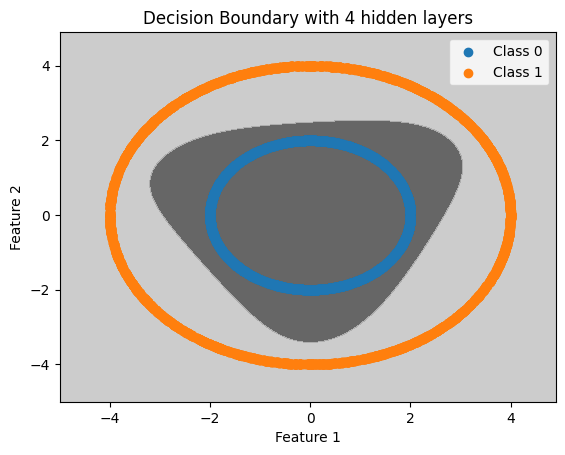

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mlp_a = MLP(hidden_layer_size=4)

train_losses, test_losses, train_accuracies, \
    test_accuracies,weights_input_hidden, bias_input_hidden, weights_hidden_output, bias_hidden_output = mlp_a.train_neural_network(X_train, 
                                                                                        y_train, X_test, y_test)
# plotting train and test losses and accuracies
mlp_a.plot_loss_and_accuracy(train_losses,test_losses,train_accuracies,test_accuracies)

# Plot the decision boundary
mlp_a.plot_decision_boundary(X, y, weights_input_hidden.data, bias_input_hidden.data,
                             weights_hidden_output.data, bias_hidden_output.data,num_hidden=4)

Epoch 0, Train Loss: 1.455, Train Accuracy: 0.4995, Test Loss: 1.24, Test Accuracy: 0.502
Epoch 100, Train Loss: 0.384, Train Accuracy: 1.0, Test Loss: 0.381, Test Accuracy: 1.0
Epoch 200, Train Loss: 0.173, Train Accuracy: 1.0, Test Loss: 0.173, Test Accuracy: 1.0
Epoch 300, Train Loss: 0.112, Train Accuracy: 1.0, Test Loss: 0.112, Test Accuracy: 1.0
Epoch 400, Train Loss: 0.086, Train Accuracy: 1.0, Test Loss: 0.086, Test Accuracy: 1.0


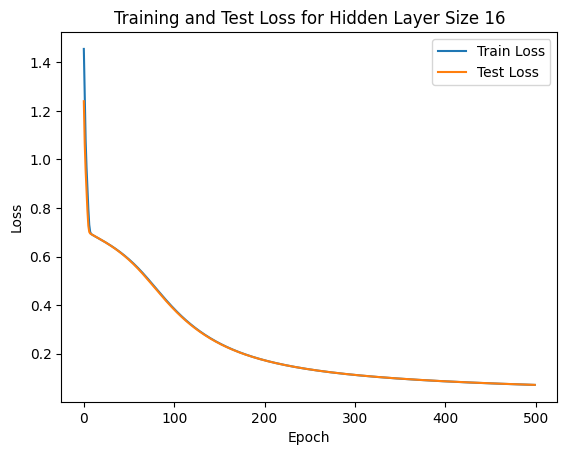

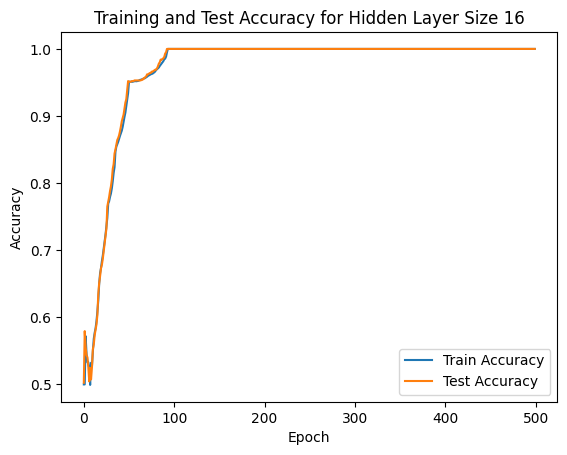

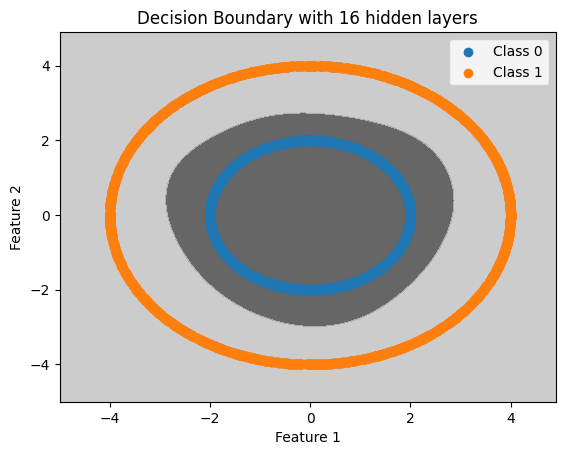

In [12]:


mlp_b = MLP(hidden_layer_size=16)

train_losses, test_losses, train_accuracies, test_accuracies,\
    weights_input_hidden, bias_input_hidden, weights_hidden_output, bias_hidden_output = mlp_b.train_neural_network(X_train, 
                                                                                        y_train, X_test, y_test)
# plotting train and test losses and accuracies
mlp_b.plot_loss_and_accuracy(train_losses,test_losses,train_accuracies,test_accuracies)

# Plot the decision boundary
mlp_b.plot_decision_boundary(X, y, weights_input_hidden.data, bias_input_hidden.data,
                       weights_hidden_output.data, bias_hidden_output.data,num_hidden=16)

## 3.1 Approach 

1. We created `two concentric circles` as a binary classification dataset that is not linearly separable in 2D
2. We defined a Multi Layered Perceptron and defined associated functions built from scratch in the MLP class
3. We used sigmoid as an activation function and binary cross entropy as the loss function
4. We train the MLP and plot the training,test loss and accuracy values obtained.
5. We also plot and compared the decision boundary generated with the increase in the number of hidden layers

## 3.2 Observations

1. Training,Test loss decreases with increase in epoch
2. Training,Test accuracy increases with increase in epoch
3. `The decision boundary approaches a circular shape with increase in number of hidden layers` 


## Self AutoGrad Engine(Optional)

In this section i have tried creating a toy autograd engine as mentioned in Variation section of Q3.



In [13]:
class TensorValue:
  
  def __init__(self, data, _children=(), _op='', label=''):
    # Convert data to a NumPy array
    self.data = np.array(data)  
    # Initialize the gradient as an array of zeros with the same shape as the data
    self.grad = np.zeros_like(self.data)
      
    # Placeholder for the backward function
    self._backward = lambda: None
    
    # Set of previous nodes (parents)
    self._prev = set(_children)
    
    # Operation associated with the current node
    self._op = _op
    
    # Optional label for the node
    self.label = label

  
  def __add__(self, other):
    # Convert other to a TensorValue if it is not already
    other = other if isinstance(other, TensorValue) else TensorValue(other)
    
    # Create a new instance representing the addition operation
    out = TensorValue(self.data + other.data, (self, other), '+')

    def _backward():
      self.grad = self.grad + (1.0 * out.grad)
      other.grad = other.grad + (1.0 * out.grad)

    # Assign the backward function to the new Value instance
    out._backward = _backward
    return out


  def __mul__(self, other):
    # Convert other to a Value if it is not already
    other = other if isinstance(other, TensorValue) else TensorValue(other)
    
    # Create a new Value instance representing the multiplication operation
    out = TensorValue(self.data * other.data, (self, other), '*')

    def _backward():
      # Calculate the gradients using the chain rule and update the gradients of the operands
      self.grad = self.grad + (other.data * out.grad)
      other.grad = other.grad + (self.data * out.grad)

    # Assign the backward function to the new Value instance
    out._backward = _backward
    return out


  def __pow__(self, other):
    if isinstance(other, (int, float)):
      # If the exponent is a scalar, perform element-wise power operation
      out_data = np.power(self.data, other)
      out = TensorValue(out_data, (self,), f'**{other}')

      def _backward():
        # Calculate the gradients using the chain rule and update the gradients of the operand
        self.grad = self.grad + ((other * np.power(self.data, other - 1)) * out.grad)

      out._backward = _backward
      return out
        
    elif isinstance(other, TensorValue):
      # If the exponent is a Value instance, perform element-wise power operation
      out_data = np.power(self.data, other.data)
      out = TensorValue(out_data, (self, other), f'**')

      def _backward():
        # Calculate the gradients using the chain rule and update the gradients of the operands
        self.grad = self.grad + ((other.data * np.power(self.data * other.data - 1)) * out.grad)
        other.grad = other.grad + (np.log(self.data) * out.grad)

      out._backward = _backward
      return out
    
    else:
      raise TypeError("Unsupported operand type(s) for **: 'TensorValue' and '{}'".format(type(other).__name__))


  def __radd__(self, other):
    # Perform right addition by the TensorValue instance
    return self + other


  def __rmul__(self, other):
    # Perform right multiplication by the TensorValue instance
    return self * other


  def __truediv__(self, other):
    # Perform true division by the TensorValue instance
    return self * other**-1


  def __neg__(self):
    # Perform negation of the TensorValue instance
    return self * -1


  def __sub__(self, other):
    # Perform subtraction of a TensorValue instance
    return self + (-other)


  def exp(self):
    # Compute the element-wise exponential of the TensorValue instance
    x = self.data
    out = TensorValue(np.exp(x), (self, ), 'exp')

    def _backward():
        # Calculate the gradients using the chain rule
        self.grad = self.grad + (out.data * out.grad)

    # Assign the backward function to the new TensorValue instance
    out._backward = _backward
    return out

  def tanh(self):
    # Compute the element-wise hyperbolic tangent of the TensorValue instance
    x = self.data
    t = np.tanh(x)
    out = TensorValue(t, (self, ), 'tanh')

    def _backward():
        # Calculate the gradients using the chain rule
        self.grad = self.grad + ((1 - t**2) * out.grad)

    # Assign the backward function to the new TensorValue instance
    out._backward = _backward
    return out


  def backward(self):
    # Perform backpropagation to compute gradients
    topo = []
    visited = set()

    def build_topo(v):
        if v not in visited:
            visited.add(v)
            for child in v._prev:
                build_topo(child)
            topo.append(v)

    # Build the topological order of nodes
    build_topo(self)

    # Set the gradient of the output to ones (assuming scalar loss)
    self.grad = np.ones_like(self.data)

    # Perform backward pass through the nodes in reverse topological order
    for node in reversed(topo):
        node._backward()


  def __repr__(self):
    # String representation of the TensorValue instance
    return f"TensorValue(data={self.data})"

In [14]:
class Neuron:

  def __init__(self, nin):
    # Initialize the neuron with random weights and bias between -1 and 1
    self.w = [TensorValue(np.random.uniform(-1, 1)) for _ in range(nin)]
    self.b = TensorValue(np.random.uniform(-1,1))
  
  def __call__(self, x):
    # Calculate the weighted sum of inputs multiplied by weights and add the bias
    act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
    # Apply the hyperbolic tangent function to the activation
    out = act.tanh()
    # Return the output of the neuron
    return out
  
  def parameters(self):
    # Return the weights and bias of the neuron as parameters
    return self.w + [self.b]

  
class Layer:
  def __init__(self, nin, nout):
    # Create a layer with a specified number of input and output neurons
    self.neurons = [Neuron(nin) for _ in range(nout)]
  
  def __call__(self, x):
    # Compute the output of each neuron in the layer given an input
    outs = [n(x) for n in self.neurons]
    # If there is only one output neuron, return it directly; otherwise, return a list of outputs
    return outs[0] if len(outs) == 1 else outs
  
  def parameters(self):
    # Return the parameters of all neurons in the layer
    return [p for neuron in self.neurons for p in neuron.parameters()]

  
class MLP:
    
    def __init__(self, input_size,hidden_layer_size,output_size):
        # Create a multi-layer perceptron (MLP) with the specified number of input and output neurons for each layer
        sz = [input_size,hidden_layer_size,output_size]
        nouts = [hidden_layer_size,output_size]
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]
    
    def __call__(self, x):
        # Forward propagate the input through all layers of the MLP
        for layer in self.layers:
          x = layer(x)
        # Return the final output of the MLP
        return x
    
    def parameters(self):
        # Return the parameters of all layers in the MLP
        return [p for layer in self.layers for p in layer.parameters()]

    def binary_cross_entropy_loss(self, y_pred, y_gt):
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # Avoid log(0) and log(1)
        return -np.mean(y_gt * np.log(y_pred) + (1 - y_gt) * np.log(1 - y_pred))    

    
    def train(self,xs, ys,epochs=201, learning_rate=0.001):
        loss = 0.0;
        losses = [];epoch_list = []
        for k in range(epochs):
            # Forward pass
            ypred = [self.__call__(x) for x in xs]
            
            loss = sum((yout - ygt) ** 2 for ygt, yout in zip(ys, ypred))
            
            # Backward pass
            for p in self.parameters():
                p.grad = 0.0
                
            # Compute gradients using the backward method
            loss.backward()
            
            # Update weights
            for p in self.parameters():
                p.data -= learning_rate * p.grad
                
            if k%50==0:
                print(k, loss.data)
                losses.append(loss.data)
                epoch_list.append(k)

         # Plot the training loss
        plt.plot(epoch_list, losses)
        plt.title('Training Loss Over Epochs')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.show()

    

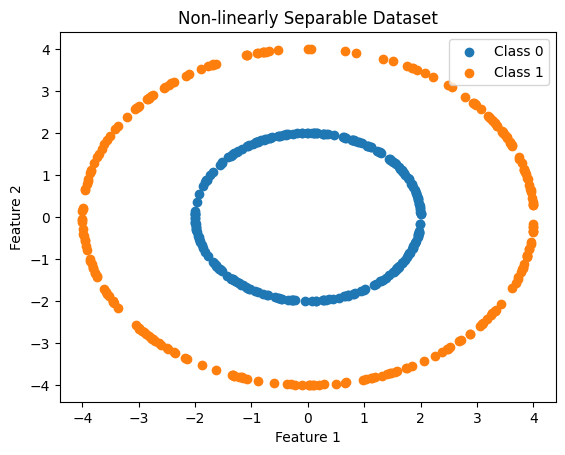

In [15]:
def generate_non_linearly_separable_dataset(num_points, inner_radius, outer_radius):
    """
    generates dataset with two concentric circles i.e non linearly separable dataset
    """
    np.random.seed(seed_val)

    # Generate random angles for points on the circles
    theta_inner = np.random.uniform(0, 2*np.pi, num_points // 2)
    theta_outer = np.random.uniform(0, 2*np.pi, num_points // 2)

    # Generate points on the circumference of the circles
    inner_circle_x = inner_radius * np.cos(theta_inner)
    inner_circle_y = inner_radius * np.sin(theta_inner)

    outer_circle_x = outer_radius * np.cos(theta_outer)
    outer_circle_y = outer_radius * np.sin(theta_outer)

    # Combine the points and labels
    X = np.vstack((np.column_stack((inner_circle_x, inner_circle_y)),
                   np.column_stack((outer_circle_x, outer_circle_y))))

    y = np.concatenate((np.zeros(num_points // 2), np.ones(num_points // 2)))

    # Shuffle the dataset
    shuffle_indices = np.random.permutation(num_points)
    X = X[shuffle_indices]
    y = y[shuffle_indices]

    return X, y

def plot_dataset(X,y):
    """
    Plot the dataset
    """
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Class 0')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Class 1')
    plt.title('Non-linearly Separable Dataset')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()


X,y = generate_non_linearly_separable_dataset(num_points=500,inner_radius=2,outer_radius=4)

plot_dataset(X,y)

0 237.99621652010072
50 113.5578185396705
100 44.0741908579446
150 42.027213877219914
200 39.33728459295948


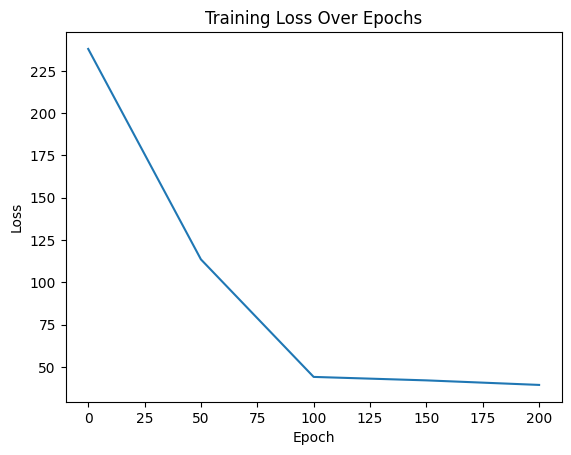

In [16]:
input_size = X.shape[1]
hidden_layer_size=16
output_size = 1
mlp_obj = MLP(input_size,hidden_layer_size,output_size)



mlp_obj.train(X,y)
